In [1]:
import json
import numpy as np
from matplotlib import pyplot as plt 

### Analysis

In [2]:
with open('data/out/log.json') as fp:
    log = json.load(fp)

In [3]:
t1 = log['data'].keys() # limiar
t1 = np.array(list(map(int, t1)))

In [4]:
m = np.zeros((len(t1), len(log['data']['200'])))

In [5]:
m.shape

(56, 48)

In [6]:
for i, threshold in enumerate(log['data'].keys()):
    for j, img in enumerate(log['data'][threshold].keys()):
        m[i][j] = log['data'][threshold][img]

In [7]:
m1 = m[:, :24]
m2 = m[:, 24:]

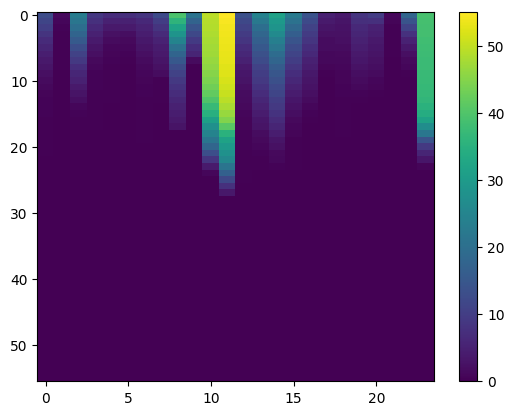

In [8]:
plt.imshow(m1, aspect='auto')
plt.colorbar()
plt.show()

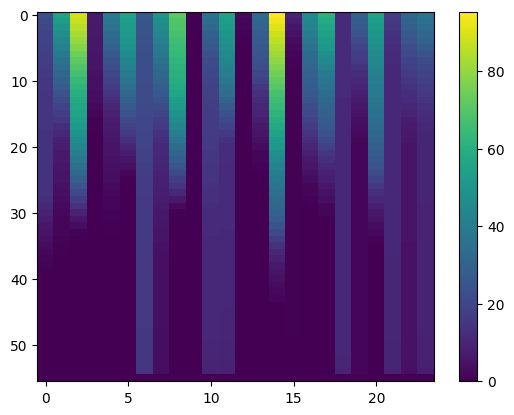

In [9]:
plt.imshow(m2, aspect='auto')
plt.colorbar()
plt.show()

In [29]:
t2 = np.linspace(0, 100, 500) # valor de decisão

In [30]:
accuracy = np.zeros((len(t1), len(t2)))
precision = np.zeros((len(t1), len(t2)))
recall = np.zeros((len(t1), len(t2)))

In [31]:
for i in range(len(t1)):
    for j, t in enumerate(t2):
        vp = sum(m2[i, :] >= t)
        fn = sum(m2[i, :] < t)
        vn = sum(m1[i, :] < t)
        fp = sum(m1[i, :] >= t)
        accuracy[i, j] = (vp+vn)/(vp+vn+fp+fn)
        precision[i, j] = vp/(vp+fp)
        recall[i, j] = vp/(vp+fn)

f1 = 2*precision*recall/(precision+recall)

/tmp/ipykernel_2522/4044394405.py:8: RuntimeWarning: invalid value encountered in scalar divide
  precision[i, j] = vp/(vp+fp)


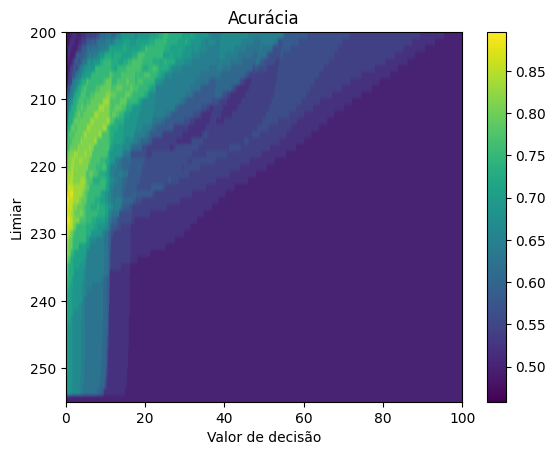

In [32]:
plt.imshow(accuracy, aspect='auto', extent=[0,t2.max(),t1.max(),t1.min()])
plt.xlabel('Valor de decisão')
plt.ylabel('Limiar')
plt.title('Acurácia')
plt.colorbar()
plt.show()

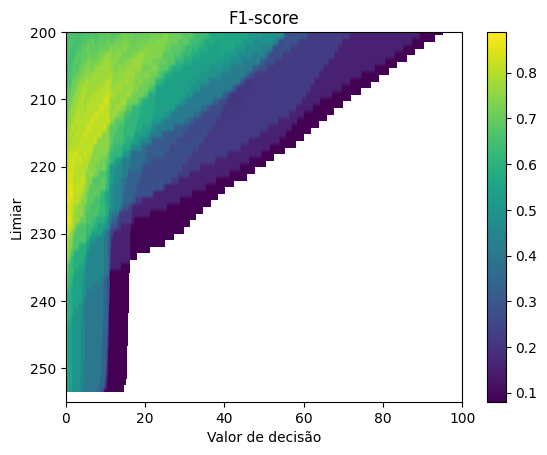

In [35]:
plt.imshow(f1, aspect='auto', extent=[0,t2.max(),t1.max(),t1.min()])
plt.xlabel('Valor de decisão')
plt.ylabel('Limiar')
plt.title('F1-score')
plt.colorbar()
plt.show()

In [36]:
max_accuracy = accuracy.max()
max_accuracy 

0.8958333333333334

In [37]:
np.where(accuracy == max_accuracy)

(array([25, 28, 28]), array([2, 1, 2]))

In [38]:
max_f1 = max(f1[f1 != np.nan])
max_f1 

0.888888888888889

In [39]:
np.where(f1 == max_f1)

(array([25]), array([2]))

In [43]:
t1[25]

225

In [42]:
t2[2]

0.40080160320641284